This is a exploration notebook

In [19]:
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
# get house information
houses = fetch_california_housing()

In [4]:
x = houses.data
y = houses.target

df_data = pd.DataFrame(houses.data, columns=houses.feature_names)
df_target = pd.DataFrame(houses.target, columns=['Target'])
df = pd.concat([df_data, df_target], axis=1, sort=False)


In [5]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Data visualization
It gives an overall understanding of the nature of the data as well as the operations/tranformations that the models to train to could benefit from.

array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Target'}>]], dtype=object)

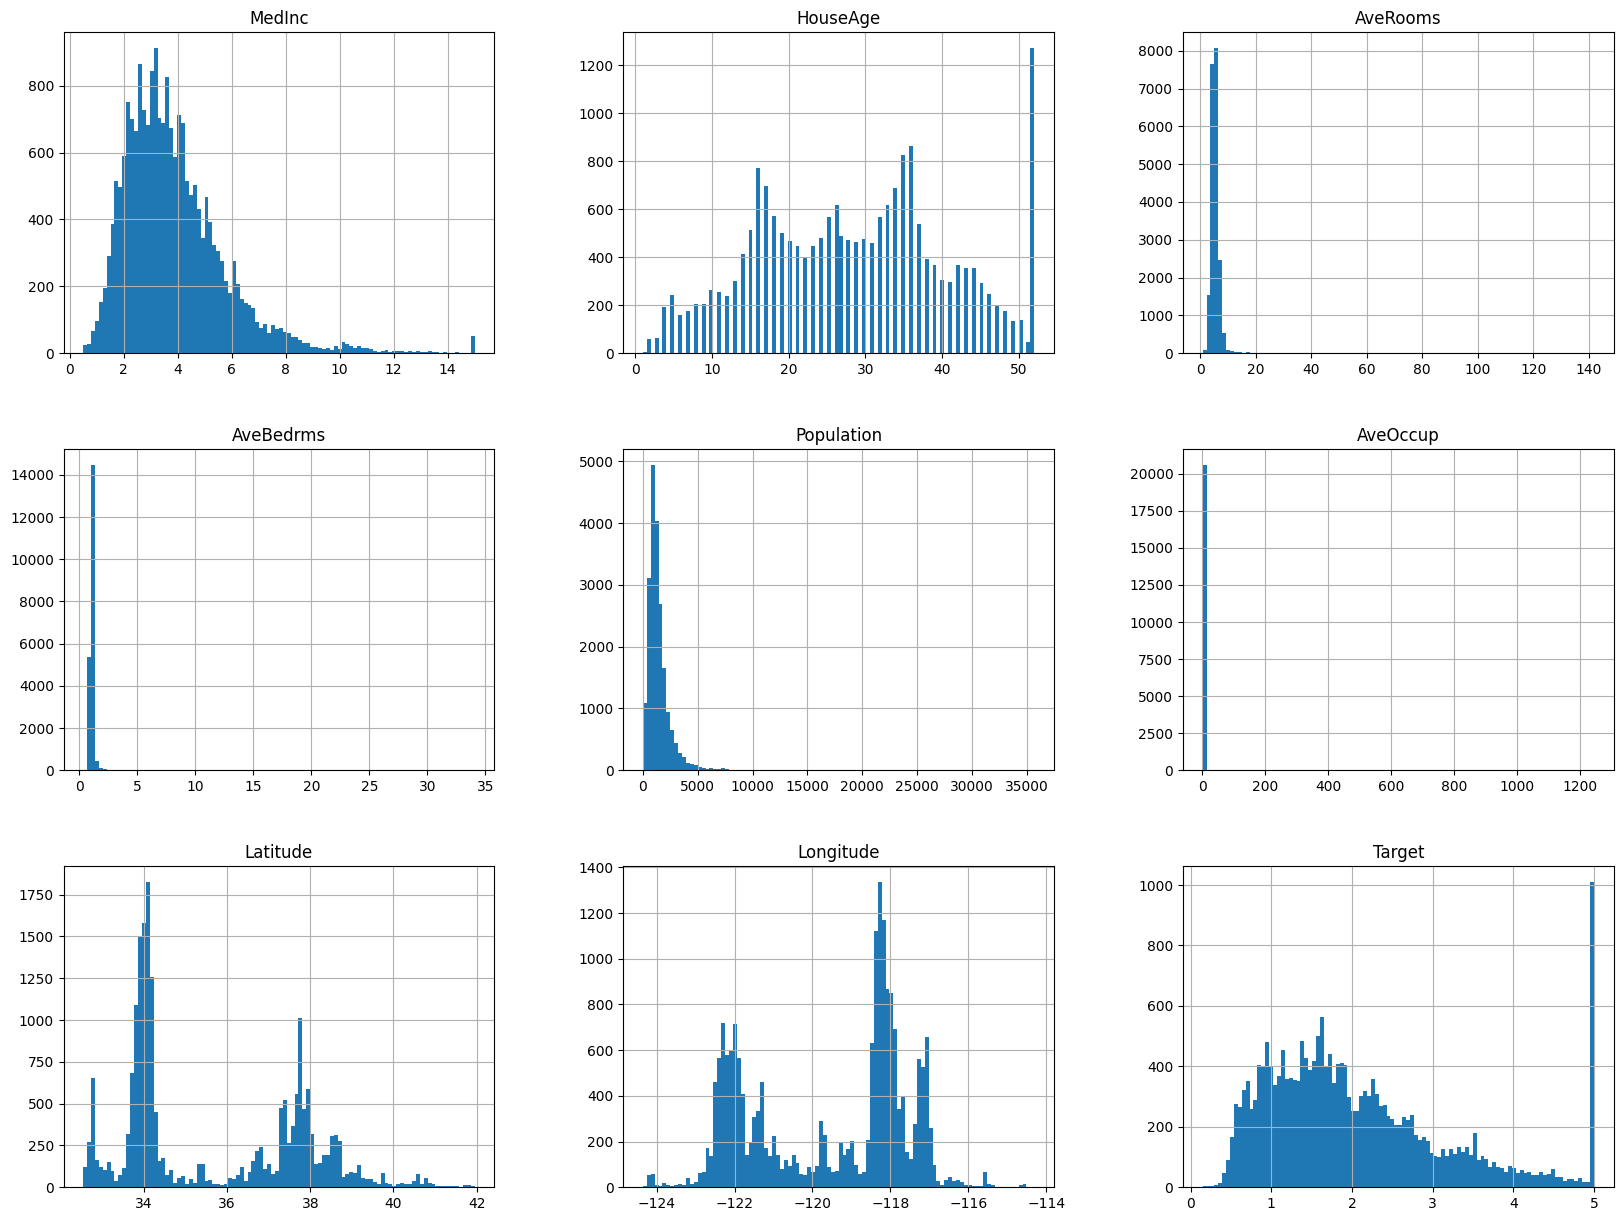

In [6]:
df.hist(bins=100, figsize=(20,15))

From the plots it is clear that:

1. The attributes have different scales so rescaling is needed
2. The targetand median have clear outliers. Those will need to be deleted
3. I suppose that the house age have a peak as a result of the fact that houses over a certain age end up getting that maximum number

# Data cleaning


In [7]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.drop_duplicates(inplace=True)

## Standardize

In [10]:

from sklearn.preprocessing import StandardScaler

def transform1(X):
  x = StandardScaler().fit_transform(X)
  X = pd.DataFrame(x, columns=X.columns)
  return X

def transform2(X,y=None):
    import numpy as np
    from scipy.special import boxcox1p        
    X['AveRooms']=X['AveRooms'].apply(lambda x: boxcox1p(x,0.25))
    X['AveBedrms']=X['AveBedrms'].apply(lambda x: boxcox1p(x,0.25))
    X['HouseAge']=X['HouseAge'].apply(lambda x: boxcox1p(x,0.25))
    X['Population']=X['Population'].apply(lambda x: boxcox1p(x,0.25))
    X['AveOccup']=X['AveOccup'].apply(lambda x: boxcox1p(x,0.25))
    X['Latitude']=X['Latitude'].apply(lambda x: boxcox1p(x,0.25))
    X['MedInc']=X['MedInc'].apply(lambda x: boxcox1p(x,0.25))
    # an offset is needed becouse the data is negative
    X['Longitude']=X['Longitude'].apply(lambda x: boxcox1p(x+125,0.25))
    X['Target']=X['Target'].apply(lambda x: boxcox1p(x,0.25))
    return X

    
df = transform2(df)

array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Target'}>]], dtype=object)

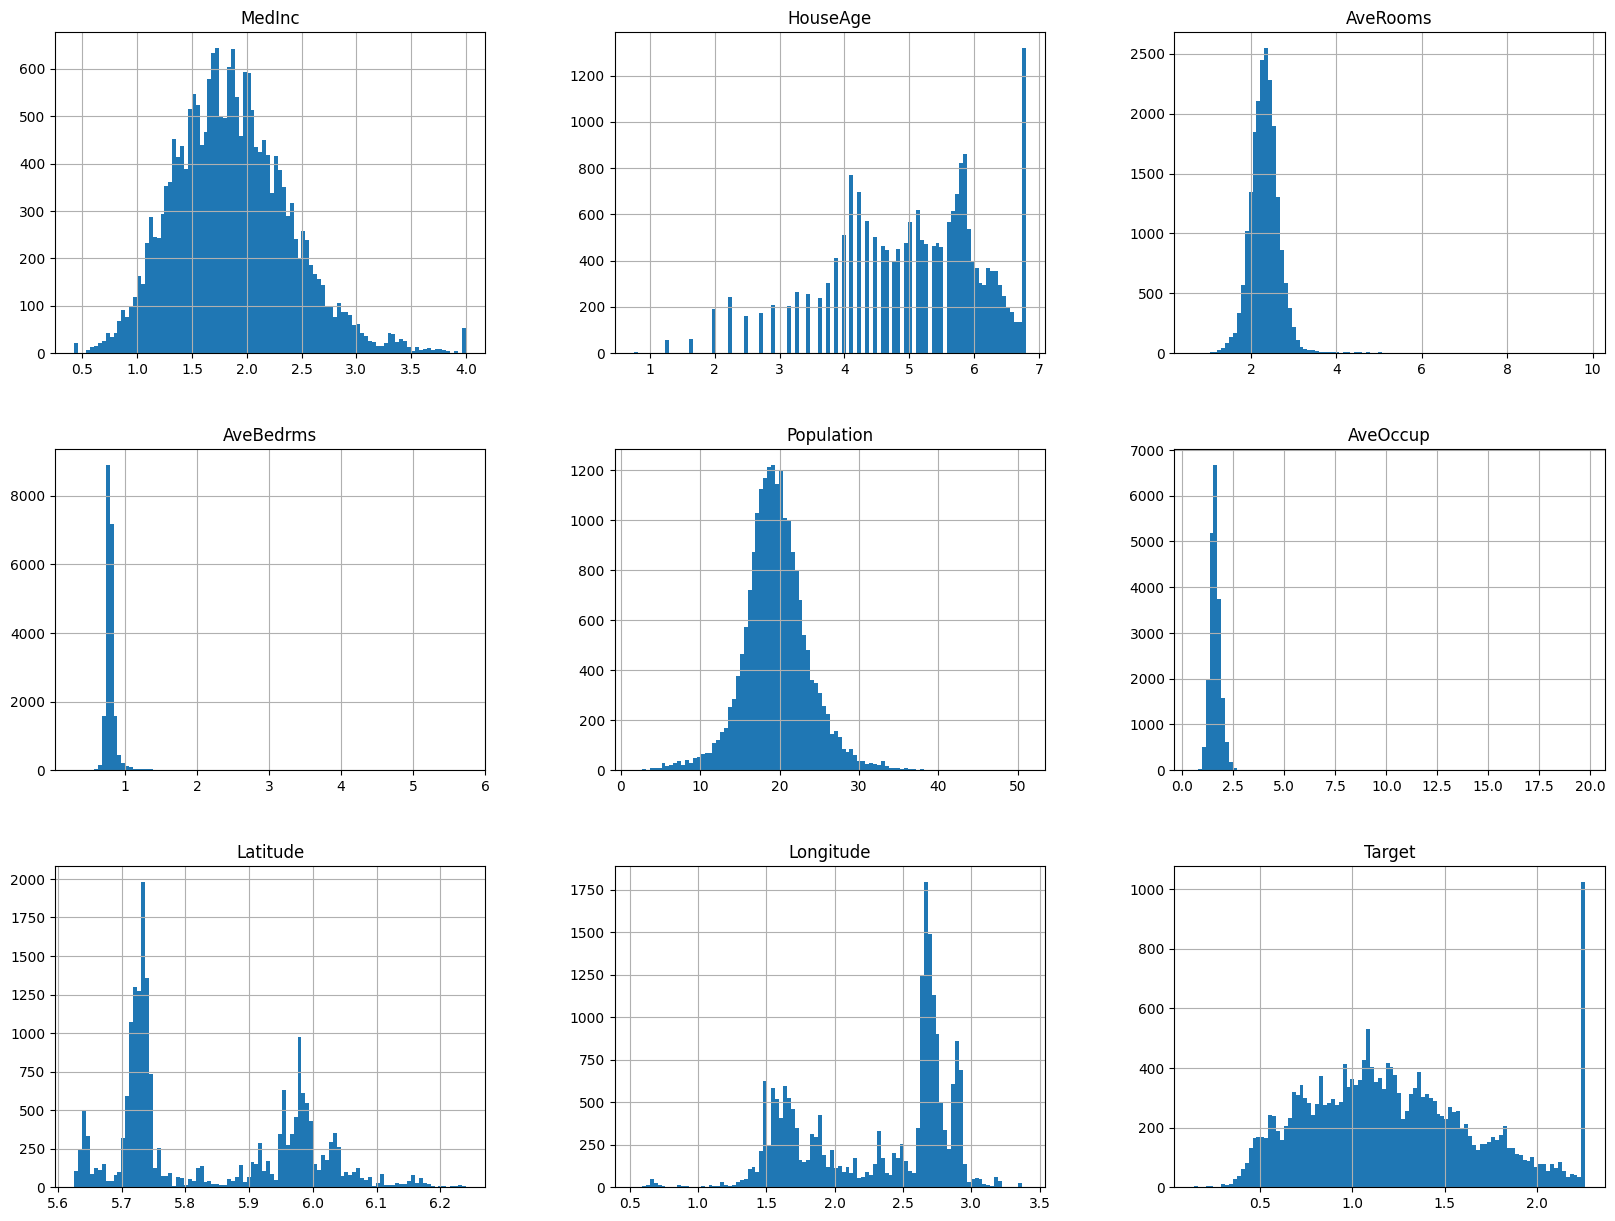

In [11]:
df.hist(bins=100, figsize=(20,15))

## Correlation analysis

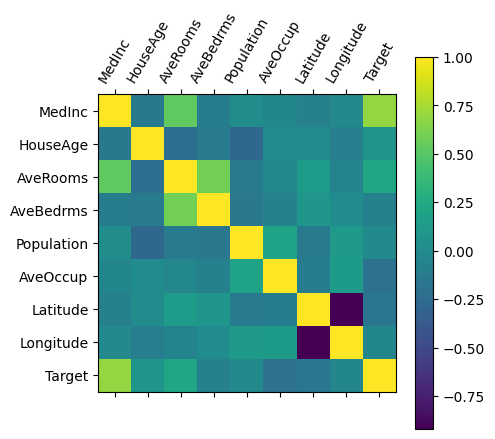

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
MedInc,1.000000,-0.146516,0.527787,-0.110333,0.019547,-0.036270,-0.083011,-0.013237,0.688867
HouseAge,-0.146516,1.000000,-0.219691,-0.119871,-0.273806,0.010693,0.005362,-0.095173,0.075256
AveRooms,0.527787,-0.219691,1.000000,0.591297,-0.131645,-0.027987,0.138555,-0.058171,0.219160
AveBedrms,-0.110333,-0.119871,0.591297,1.000000,-0.151471,-0.076174,0.083644,0.015681,-0.083908
Population,0.019547,-0.273806,-0.131645,-0.151471,1.000000,0.187266,-0.136856,0.116194,-0.003522
AveOccup,-0.036270,0.010693,-0.027987,-0.076174,0.187266,1.000000,-0.109058,0.127576,-0.204878
Latitude,-0.083011,0.005362,0.138555,0.083644,-0.136856,-0.109058,1.000000,-0.920040,-0.165399
Longitude,-0.013237,-0.095173,-0.058171,0.015681,0.116194,0.127576,-0.920040,1.000000,-0.035070
Target,0.688867,0.075256,0.219160,-0.083908,-0.003522,-0.204878,-0.165399,-0.035070,1.000000


In [12]:
corr = df.corr()
plt.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=60);
plt.yticks(range(len(corr.columns)), corr.columns);
plt.colorbar()
plt.show()
df.corr().style.background_gradient(cmap='coolwarm')

It is clear from this plot that the average number of bedrooms and average number of rooms are somewhat correlated, so both variables move in the same direction by similar magnitude. This is also true for the median income and the average number of rooms. The longitude and magnitudes is strongly negatively correlated, which means that the variables move in opposite direction by the same magnitude.

The strongest correlation to the target is the median income for households within a block of houses (measured in tens of thousands of US Dollars). The rest of the signal shows barely any correlation to the target at all.

# Split datat in train and test

In [13]:
from sklearn.model_selection import train_test_split

df_target = df.loc[:, df.columns == 'Target']
df_data = df.loc[:, df.columns != 'Target']

xtrain,xtest,ytrain,ytest=train_test_split(df_data,df_target,test_size=0.1,random_state=0)

print('train data shape'+str(xtrain.shape))
print('test data shape'+str(xtest.shape))
print('train target shape'+str(ytrain.shape))
print('test target shape'+str(ytest.shape))

train data shape(18576, 8)
test data shape(2064, 8)
train target shape(18576, 1)
test target shape(2064, 1)


# Model Training

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics


# We have created a function to print accuracy metrics which can be used
# to get accuracy metrics of all models in upcoming steps
def print_accuracy_report(y_test, y_pred, X_test, model):
    print('R Squared(Accuracy)', metrics.r2_score(y_test, y_pred))
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)), '\n')


def LinearRegressionModel(xtrain, ytrain, xtest):
    regressor = LinearRegression()
    regressor.fit(xtrain, ytrain)
    ypred = regressor.predict(xtest)
    print_accuracy_report(ytest, ypred, xtest, regressor)
    return regressor


def RandomForestRegressorModel(xtrain, ytrain, xtest):
    rf = RandomForestRegressor(random_state=42)
    rf.fit(xtrain, ytrain)
    ypred = rf.predict(xtest)
    print(print_accuracy_report(ytest, ypred, xtest, rf))
    return rf


print('\t\t-- Linear regression results --')
LinearRegressionModel(xtrain, ytrain, xtest)

print('\t\t-- Random forest results --')
randomForestModel = RandomForestRegressorModel(xtrain, ytrain, xtest)

		-- Linear regression results --
R Squared(Accuracy) 0.6423781457445668
Mean Absolute Error: 0.21007842215108244
Mean Squared Error: 0.08142657835260238
Root Mean Squared Error: 0.28535342709104156 

		-- Random forest results --
R Squared(Accuracy) 0.8306621018093299
Mean Absolute Error: 0.13304257420647272
Mean Squared Error: 0.03855638426738603
Root Mean Squared Error: 0.1963577965536027 

None


1. Random Forest clearly outperforms Linear Regression: R² ≈ 0.831 vs 0.642, explaining much more variance.
2. Errors are markedly lower with Random Forest: MAE drops ~37% (0.211 → 0.133), MSE ~53% (0.081 → 0.039), RMSE ~31% (0.286 → 0.196).
3. Random Forest is better than Linear Regression